In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [19]:
def calc_freq(pc_val='PC1', direction='greater', pathways='/which/path'):
    #pc
    pc=pd.read_csv('/Users/aporter1350/Google Drive/WIN_Matter/connectometry/output/'+pc_val+'/region_tracking/'+pc_val+'_'+direction+'_AAL65_cg_edited.txt', sep='\t')
    #pc=pd.read_csv(pc_path, sep='\t')
    #path
    path=pd.read_csv('/Users/aporter1350/Google Drive/WIN_Matter/connectometry/output/'+pathways+'.txt', sep='\t', header=2, index_col=2)
    #path=pd.read_csv(pathways, sep='\t', header=2, index_col=2)
    #drop first 2 columns
    path.drop([path.columns[0], path.columns[1]], axis='columns', inplace=True)
    #iterate through the pathway matrix and add one for every nonzero entity, calculating the total count of possible values
    i=0
    #iterate through the pc matrix and add one for every nonzero entitiy that exists for every nonzero that exists in pathway matrix
    j=0
    colnames=list(path.columns)
    for col in colnames:
        for path_row, pc_row in zip(path[col], pc[col]):
            if path_row>0:
                i=i+1
                if pc_row>0:
                    j=j+1
    freq=(j/i)
    return(freq)

In [20]:
freq_df=pd.DataFrame(columns=['Factor', 'Direction', 'Pathway', 'Frequency'])
pathways=['projection', 'commissural','association']
pcvals=['PC1','PC2']
direction=['greater','lesser']
for PC in pcvals:
    for dire in direction:
        for path in pathways:
            freq=calc_freq(PC, dire, path)
            freq_df = freq_df.append({'Factor': PC, 'Direction':dire, 'Pathway':path, 'Frequency':freq}, ignore_index=True)
            

In [21]:
freq_df.to_csv('/Users/aporter1350/Google Drive/WIN_Matter/analysis/data/frequency_PC.csv')



In [22]:
#reverse direction for PC1
Correlation=[]
Pathways=[]
#reversing order
for row in freq_df['Direction']:
    if row == 'greater':
        Correlation.append('Negative')
    else:
        Correlation.append('Positive')
freq_df['Correlation']=Correlation

for row in freq_df['Pathway']:
    if row=='projection':
        Pathways.append('Projection')
    elif row=='commissural':
        Pathways.append('Commissural')
    else:
        Pathways.append('Association')
freq_df['Pathways']=Pathways

subset_pc1=freq_df['Factor']=="PC1"
pc1_df=freq_df[subset_pc1]
pc1_df.drop('Direction', axis=1, inplace=True)
pc1_df.drop('Pathway', axis=1, inplace=True)

In [23]:
pc1_df

,Factor,Frequency,Correlation,Pathways
0,PC1,0.517483,Negative,Projection
1,PC1,0.040678,Negative,Commissural
2,PC1,0.281853,Negative,Association
3,PC1,0.517483,Positive,Projection
4,PC1,0.186441,Positive,Commissural
5,PC1,0.505792,Positive,Association


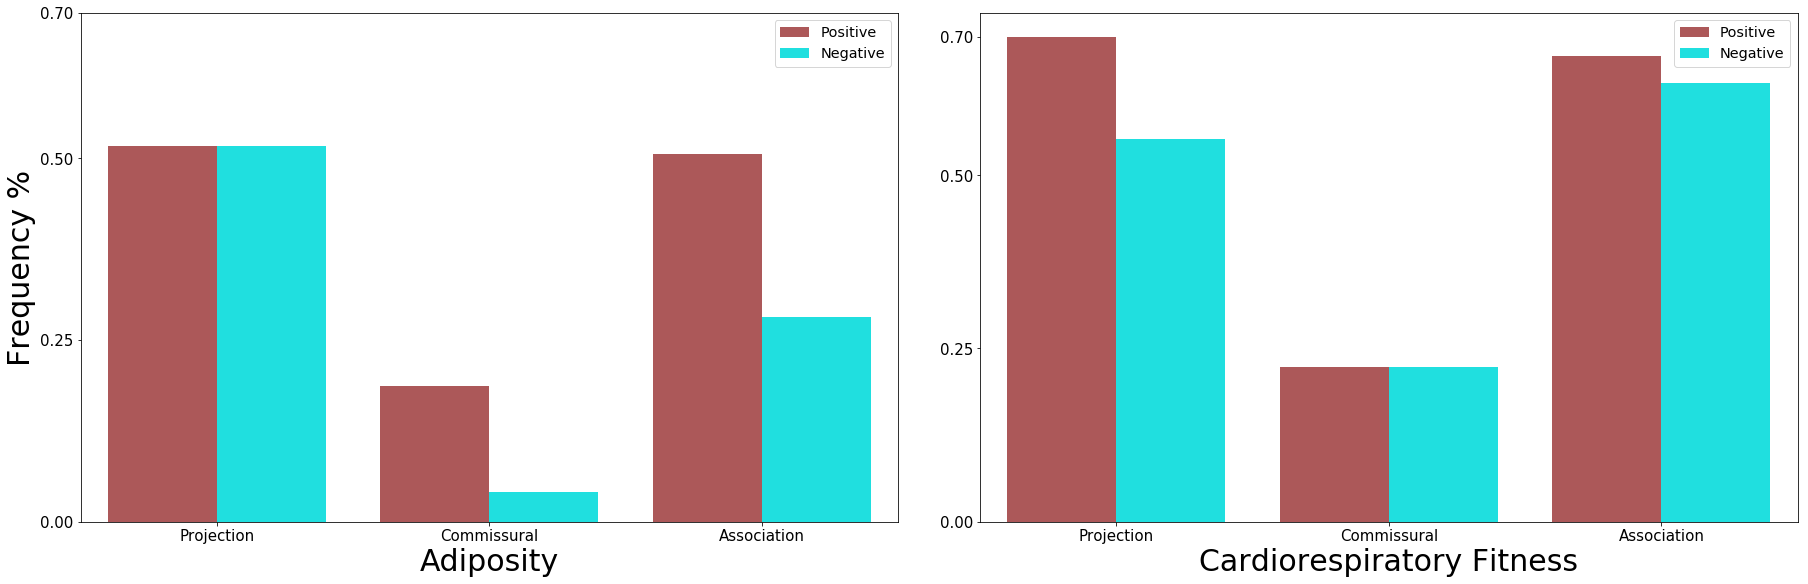

In [80]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from jupyterthemes import jtplot

fig=plt.figure(figsize=(25,8), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 2 columns
gs=gridspec.GridSpec(1,2, figure=fig)
ax1=fig.add_subplot(gs[0,0])
sns.set_context=("talk")
ax=sns.barplot(x='Pathways', y='Frequency', hue='Correlation', data=pc1_df, palette=['#ba4a4b', '#00FFFF'], hue_order=['Positive', 'Negative'], ax=ax1)
ax.tick_params(labelsize=15)
ax.legend(fontsize='x-large', loc='upper right')
ax.set_ylabel('Frequency %',fontsize=30)
ax.set_xlabel('Adiposity',fontsize=30)
plt.yticks([0, .25, .50, .7])

ax2=fig.add_subplot(gs[0,1])
sns.set_context=('talk')
plt.yticks([0, .25, .50, .7])
ax2=sns.barplot(x='Pathways', y='Frequency', hue='Correlation', data=pc2_df, palette=['#ba4a4b','#00FFFF'], ax=ax2)
ax2.tick_params(labelsize=15)
ax2.legend(fontsize='x-large', loc='upper right')
ax2.set_ylabel(' ')
ax2.set_xlabel('Cardiorespiratory Fitness',fontsize=30)

plt.savefig("/Users/aporter1350/Google Drive/WIN_Matter/analysis/output/images/Tractography_Plots/Tract_PC.png", dpi=100, bbox_inches='tight')               


In [25]:
Correlation=[]
Pathways=[]
#reversing order
for row in freq_df['Direction']:
    if row == 'greater':
        Correlation.append('Positive')
    else:
        Correlation.append('Negative')
freq_df['Correlation']=Correlation

for row in freq_df['Pathway']:
    if row=='projection':
        Pathways.append('Projection')
    elif row=='commissural':
        Pathways.append('Commissural')
    else:
        Pathways.append('Association')
freq_df['Pathways']=Pathways



subset_pc2=freq_df['Factor']=="PC2"

pc2_df=freq_df[subset_pc2]
pc2_df.drop('Direction', axis=1, inplace=True)
pc2_df.drop('Pathway', axis=1, inplace=True)

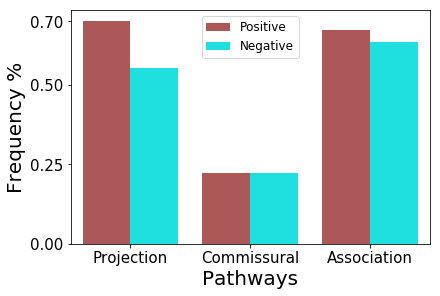

In [90]:
ax=sns.barplot(x='Pathways', y='Frequency', hue='Correlation', data=pc2_df, palette=['#ba4a4b','#00FFFF'])
ax.tick_params(labelsize=15)
ax.legend(fontsize='large', loc='upper center')
ax.set_ylabel('Frequency %',fontsize=20)
ax.set_xlabel('Pathways',fontsize=20)
plt.yticks([0, .25, .50, .7])
fig = ax.get_figure() 
fig.savefig('/Users/aporter1350/Google Drive/WIN_Matter/analysis/output/images/Tractography_Plots/Tract_PC2.png', bbox_inches='tight')


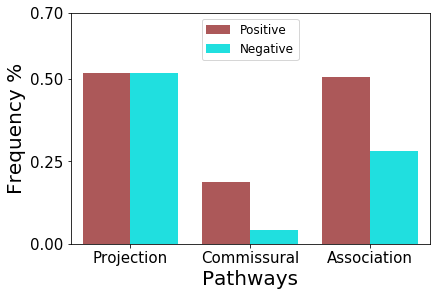

In [91]:
ax=sns.barplot(x='Pathways', y='Frequency', hue='Correlation', data=pc1_df, palette=['#ba4a4b', '#00FFFF'], hue_order=['Positive', 'Negative'])
ax.tick_params(labelsize=15)
ax.legend(fontsize='large', loc='upper center')
ax.set_ylabel('Frequency %',fontsize=20)
ax.set_xlabel('Pathways',fontsize=20)
plt.yticks([0, .25, .50, .7])
fig = ax.get_figure() 
fig.savefig('/Users/aporter1350/Google Drive/WIN_Matter/analysis/output/images/Tractography_Plots/Tract_PC1.png', bbox_inches='tight')
